# Segmenting Customers  Using Customer Segmentation Models in Python

Customer segmentation is the bedrock for defining and distributing value by customers via their products. Providing personaized offers based on cohorts of customers who share the same behaviourial traits when it  comes to shopping improves sales and utimately net earnings.

**Data Profile**

The data is derived from an E-commerce database that lists purchases made by 4000+ customers over a period of one year (from 2010/12/01 to 2011/12/09). Source of data can be found [here](https://www.kaggle.com/datasets/carrie1/ecommerce-data/data)


**Project Scope**

The scope of the project entails segmenting a set of customer using customer segmentation algorithims. The main python algorithim to be used in creating customer segments is: **K-Means algorithm**.

The custome segments will be based on a popular marketing framework used to bin customers: RFM(Recency, Frequency & Monetary).
RFM is commonly used in marketing to evaluate a client’s value based on their:

- Recency: How recently have they made a purchase?
- Frequency: How often have they bought something?
- Monetary Value: How much money do they spend on average when making purchases?


In [140]:
# load libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # for visualization

# set styles
sns.set_style('whitegrid')


In [141]:
# import dataset
# import dataset

customer_data = pd.read_csv('/content/data.csv', encoding='latin-1') # or encoding='ISO-8859-1'
customer_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [142]:
# inspect dataset structure
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Features Meaning
The dataset consists of 8 variables:

- InvoiceNo: The unique identifier of each customer invoice.
- StockCode: The unique identifier of each item in stock.
- Description: The item purchased by the customer.
- Quantity: The number of each item purchased by a customer in a single invoice.
- InvoiceDate: The purchase date.
- UnitPrice: Price of one unit of each item.
- CustomerID: Unique identifier assigned to each user.
- Country: The country from where the purchase was made.

## Data Pre-processing
Cleaning the dataset by:
- Dealing with missing values
- Data type tranformation for some columns like `InvoiceDate` from string to datetime and `CustomerID` to string


In [143]:
# check for missing values and proportion of missing values
missing_values = customer_data.isnull().sum()
proportion_missing = (missing_values / len(customer_data)) * 100
print(proportion_missing)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [144]:
# drop missing values in the CustomerID column
customer_data = customer_data.dropna(subset=['CustomerID'])


In [145]:
# tranform the InvoiceDate column to datetime
customer_data['InvoiceDate'] = pd.to_datetime(customer_data['InvoiceDate'])

In [146]:
# transform the CustomerID column to object
customer_data['CustomerID'] = customer_data['CustomerID'].astype('object')


In [147]:
# check data information
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [148]:
# inspect a customer record
customer_data.iloc[1]

,1
InvoiceNo,536365
StockCode,71053
Description,WHITE METAL LANTERN
Quantity,6
InvoiceDate,2010-12-01 08:26:00
UnitPrice,3.39
CustomerID,17850.0
Country,United Kingdom


In [149]:
# summary stats
summary_stats_excl_customerid = customer_data.drop(columns=['CustomerID']).describe()
print(summary_stats_excl_customerid)

            Quantity                    InvoiceDate      UnitPrice
count  406829.000000                         406829  406829.000000
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471
min    -80995.000000            2010-12-01 08:26:00       0.000000
25%         2.000000            2011-04-06 15:02:00       1.250000
50%         5.000000            2011-07-31 11:48:00       1.950000
75%        12.000000            2011-10-20 13:06:00       3.750000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       248.693370                            NaN      69.315162


### Exploratory Analysis

Investigate some general questions that can be answered by the dataset.
Examples of exploratory questions:
1) What's the number of unique customers?
2) What is the average number of products purchased by customers?
3) What is the average amount spent by customers?
4) What is the average amount spent by customers per month?
5) What is the leading country in terms of product volume purchased by customers?
6) What is the leadig country in terms of product value purchased by customers?


In [150]:
# Quiz 1: How many unique customers are there in the dataset?
unique_customers = customer_data['CustomerID'].nunique()
print(f"The number of distinct customers buying products from e-commerce are: {unique_customers}")

The number of distinct customers buying products from e-commerce are: 4372


In [151]:
# Quiz 2: What is the average number of products purchased by customers?
average_products_purchased = customer_data['Quantity'].mean()
print(f"The average number of products purchased by customers is: {average_products_purchased:.0f}")

The average number of products purchased by customers is: 12


In [152]:
# Quiz 3: What is the average amount spent by customers?
customer_data['AmountSpent'] = customer_data['Quantity'] * customer_data['UnitPrice'] #creating a new column for amount spent
average_amount_spent = customer_data['AmountSpent'].mean()
print(f"The average amount spent by customers is: {average_amount_spent:.2f}")

The average amount spent by customers is: 20.40


In [153]:
# Quiz 4: What is the average amount spent by customers per month?
customer_data['InvoiceMonth'] = customer_data['InvoiceDate'].dt.month
average_amount_spent_per_month = customer_data.groupby('InvoiceMonth')['AmountSpent'].mean()
formatted_average_amount_spent_per_month = average_amount_spent_per_month.apply(lambda x: f"{x:.2f}")
print("The average amount spent by customers per month is: \n", formatted_average_amount_spent_per_month)

The average amount spent by customers per month is: 
 InvoiceMonth
1     21.68
2     21.44
3     20.85
4     18.37
5     22.42
6     21.84
7     20.88
8     22.28
9     22.82
10    19.22
11    17.26
12    20.15
Name: AmountSpent, dtype: object


The top 5 leading countries in terms of product volume purchased by customers are: 
 Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Name: Quantity, dtype: int64


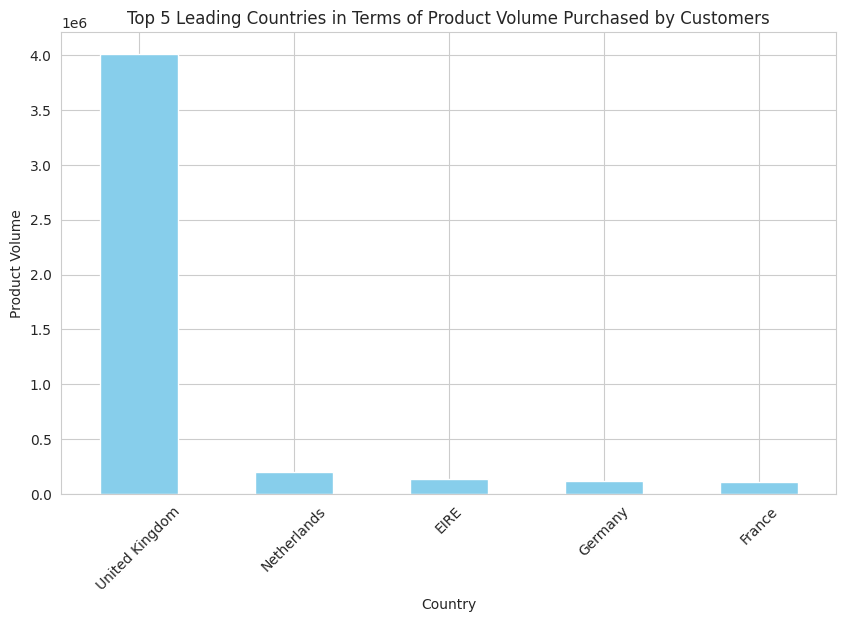

In [154]:
# Quiz 5:What are the top 5 leading country in terms of product volume purchased by customers?
top_5_countries = customer_data.groupby('Country')['Quantity'].sum().nlargest(5)
print("The top 5 leading countries in terms of product volume purchased by customers are: \n", top_5_countries)

# visualize the top 5 leading countries in terms of product volume purchased by customers
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Leading Countries in Terms of Product Volume Purchased by Customers')
plt.xlabel('Country')
plt.ylabel('Product Volume')
plt.xticks(rotation=45)
# save the image
plt.savefig('top_5_countries_volume_purchased.png')
plt.show()



The top 5 leading countries in terms of amount spent by customers are: 
 Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Name: AmountSpent, dtype: float64


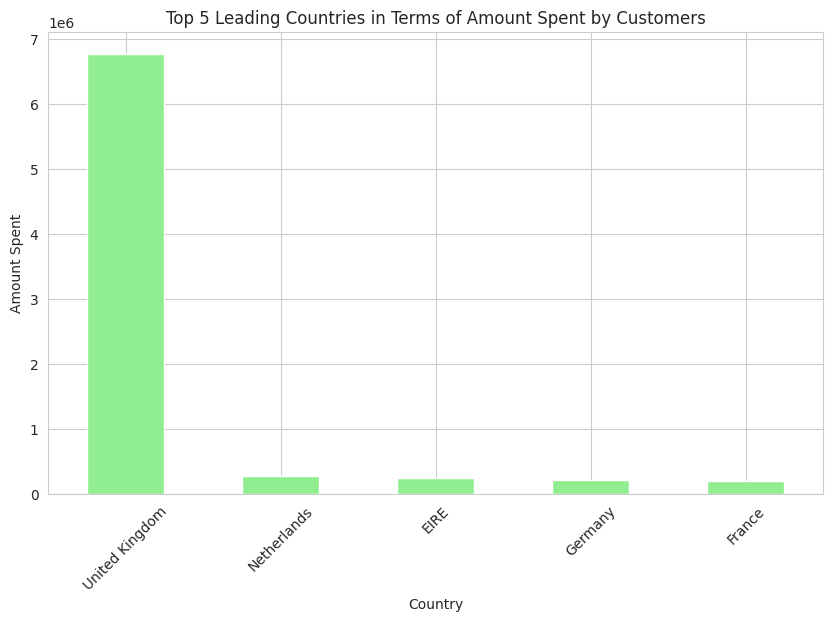

In [155]:
# Quiz 6: What are the top 5 leading countries in terms of amount spent by customers?
top_5_countries_amount_spent = customer_data.groupby('Country')['AmountSpent'].sum().nlargest(5)
print("The top 5 leading countries in terms of amount spent by customers are: \n", top_5_countries_amount_spent)

# visualize the top 5 leading countries in terms of amount spent by customers
plt.figure(figsize=(10, 6))
top_5_countries_amount_spent.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Leading Countries in Terms of Amount Spent by Customers')
plt.xlabel('Country')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
# save the image
plt.savefig('top_5_countries_amount_spent.png')
plt.show()


# Recency, Frequency & Monetary Computation: Preliminary Customer Segments
RFM computation steps involve:

a) Calculate RFM metrics:
- Recency: Days since the customer's last purchase.
- Frequency: Total number of purchases by the customer.
- Monetary: Total money spent by the customer.

b) Assign RFM scores for each FRM metric

c) Segment customers based on RFM scores


In [156]:
# Step 1: Recency of customer purchases

# reference date
reference_date = customer_data['InvoiceDate'].max()

# calculate the recency for each customer
recency_df = customer_data.groupby('CustomerID').agg({'InvoiceDate':\
                                                     lambda x: (reference_date - x.max()).days}).reset_index()

 # Rename columns
recency_df.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)
print(recency_df.head(10))

   CustomerID  Recency
0     12346.0      325
1     12347.0        1
2     12348.0       74
3     12349.0       18
4     12350.0      309
5     12352.0       35
6     12353.0      203
7     12354.0      231
8     12355.0      213
9     12356.0       22


In [157]:
# Step 2: Frequency of customer purchases
frequency_df = customer_data.groupby('CustomerID').agg({'InvoiceDate':'count'}).reset_index()
frequency_df.rename(columns={'InvoiceDate': 'Frequency'}, inplace=True)

# merge with recency_df
rf_df = pd.merge(recency_df, frequency_df, on='CustomerID')

print(rf_df.sample(10))


      CustomerID  Recency  Frequency
3829     17548.0      217         17
3637     17288.0        8        142
1618     14530.0       25        216
3237     16729.0       35        668
4361     18272.0        2        170
2843     16187.0       31        297
4260     18139.0       16        162
1851     14854.0       77        131
197      12589.0       28         35
1232     14002.0      133         47


In [158]:
# Step 3: Monetary value of customer purchases
monetary_df = customer_data.groupby('CustomerID').agg({'AmountSpent':'sum'}).reset_index()
monetary_df.rename(columns={'AmountSpent': 'Monetary'}, inplace=True)

# merge with rf_df
rfm_df = pd.merge(rf_df, monetary_df, on='CustomerID')

print(rfm_df.sample(10))

      CustomerID  Recency  Frequency  Monetary
214      12609.0       77         60   1126.85
3474     17049.0        2        322   5594.78
2910     16278.0       22         25    537.83
4012     17791.0       29         10    106.10
2148     15252.0       35         44    740.78
1957     15010.0       35         20    308.94
563      13080.0      178          6     58.08
619      13154.0      143          1   -611.86
1302     14099.0       15        252   3092.97
1289     14080.0       32          4     45.60


In [159]:
# drop the CustomerID column from rfm_df
rfm_df = rfm_df.drop(columns=['CustomerID'])

In [160]:
# Step 4: Calculate the RFM scores
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM Scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print(rfm_df.sample(10))

      Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
528        10         99    799.48       4       3       3       433
2352       32          4    148.44       3       1       1       311
1959       42         35    260.17       3       2       1       321
1163       36         26    332.64       3       2       2       322
3877       56        100    390.07       2       3       2       232
348        16         67   1351.24       4       3       3       433
2575      319         17    206.98       1       1       1       111
3236       45        269   1054.67       3       4       3       343
1750       14        197   4911.14       4       4       4       444
4287        6          1    104.00       4       1       1       411


In [161]:
# step 5: Segment customers based on RFM scores

# function of defining segments
def segment_customers(data):
    """
    Segments customers based on their RFM (Recency, Frequency, Monetary) score.

    Parameters:
    data (dict): A dictionary containing customer data with an 'RFM_Score' key.

    Returns:
    str: The segment to which the customer belongs. Possible segments include:
        - 'Best Customers'
        - 'Loyal Customers'
        - 'High Spenders'
        - 'Almost Lost'
        - 'Lost Customers'
    """
    if data['RFM_Score'] in ['444', '443', '434', '433', '344', '343', '334', '333']:
        return 'Best Customers'
    elif data['RFM_Score'] in ['424', '423', '422', '421', '414', '413', '412', '411', '324', '323', '322', '321', '314', '313', '312', '311']:
        return 'Loyal Customers'
    elif data['RFM_Score'] in ['244', '243', '234', '233', '144', '143', '134', '133']:
        return 'Big Spenders'
    elif data['RFM_Score'] in ['224', '223', '222', '221', '214', '213', '212', '211', '124', '123', '122']:
        return 'Almost Lost'
    else:
        return 'Lost Customers'

# apply the segment_customers function to the rfm_df
rfm_df['Customer_Segment'] = rfm_df.apply(segment_customers, axis=1)

In [162]:
# display the first 10 records
print(rfm_df.head(10))

   Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
0      325          2      0.00       1       1       1       111   
1        1        182   4310.00       4       4       4       444   
2       74         31   1797.24       2       2       4       224   
3       18         73   1757.55       3       3       4       334   
4      309         17    334.40       1       1       2       112   
5       35         95   1545.41       3       3       3       333   
6      203          4     89.00       1       1       1       111   
7      231         58   1079.40       1       3       3       133   
8      213         13    459.40       1       1       2       112   
9       22         59   2811.43       3       3       4       334   

  Customer_Segment  
0   Lost Customers  
1   Best Customers  
2      Almost Lost  
3   Best Customers  
4   Lost Customers  
5   Best Customers  
6   Lost Customers  
7     Big Spenders  
8   Lost Customers  
9   Best Customers  


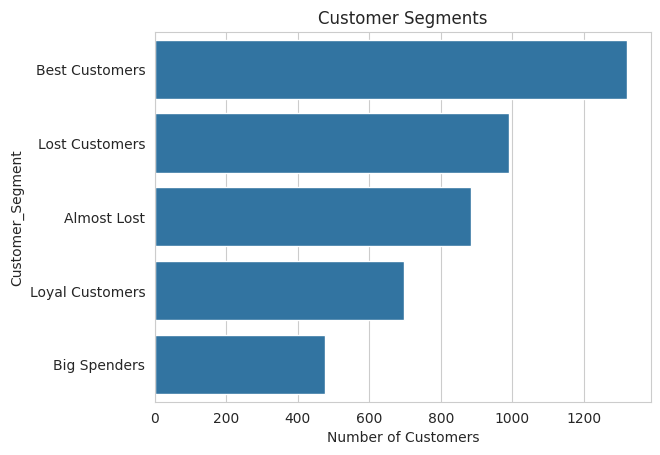

In [163]:
# Step 6: Analyze customer segments
segment_counts = rfm_df['Customer_Segment'].value_counts()
sns.countplot(y='Customer_Segment', data=rfm_df, order=segment_counts.index)
plt.title('Customer Segments')
plt.xlabel('Number of Customers')

# save the image
plt.savefig('rfm_customer_segments.png')
plt.show()

In [164]:
# save the rfm_df to a csv file
rfm_df.to_csv('rfm_data.csv', index=False)

# Building Customer Segments based on Customer Segmentation Model
In this phase, we will be creating a customer sgemention model, based on K-Means clustering algorithim.

The goal of a K-Means clustering model is to segment all the data available into non-overlapping sub-groups that are distinct from each other.

Key steps to be executed:
1. Select features that will be used to build the model
2. Check for outliers and remove them
3. Standardization of key features to be used in creating the segmentation model
4. Building segmentation model

In [165]:
# Step 1:   Select 3 columns from the rfm_df
df = rfm_df[['Recency', 'Frequency', 'Monetary']]
df.sample(5)

,Recency,Frequency,Monetary
1721,241,170,1269.99
1996,24,276,2124.99
2512,14,81,1121.21
2883,9,662,2607.87
2797,51,78,3506.54


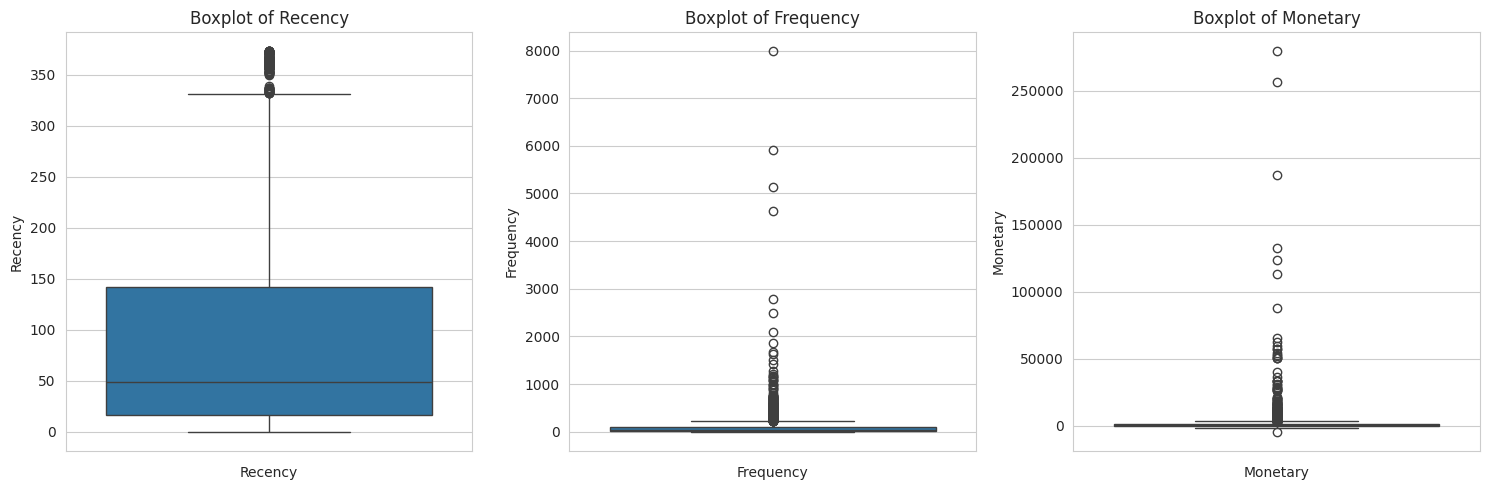

In [166]:
# Step 2: Check for outliers
items = ['Recency', 'Frequency', 'Monetary']
plt.figure(figsize=(15, 5))
for i in range(len(items)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df[items[i]])
    plt.title(f'Boxplot of {items[i]}')
    plt.xlabel(items[i])
plt.tight_layout()
plt.savefig('rfm_outliers.png')
plt.show()


Based on above visual:
- `Recency` is the only variable with no visible outliers. `Frequency` and `Monetary`, on the other hand, have many outliers that should be removed

In [167]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
# Handle outliers using z-score
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1) #remove every data point with a Z-Score >=3
df = df[filtered_entries]

df.head()

,Recency,Frequency,Monetary
0,325,2,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [168]:
# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'Monetary'])

print(df_scaled.head())

    Recency  Frequency  Monetary
0  2.308286  -0.741932 -0.634869
1 -0.902112   0.984789  1.367090
2 -0.178782  -0.463738  0.199934
3 -0.733666  -0.060836  0.181498
4  2.149747  -0.598039 -0.479543


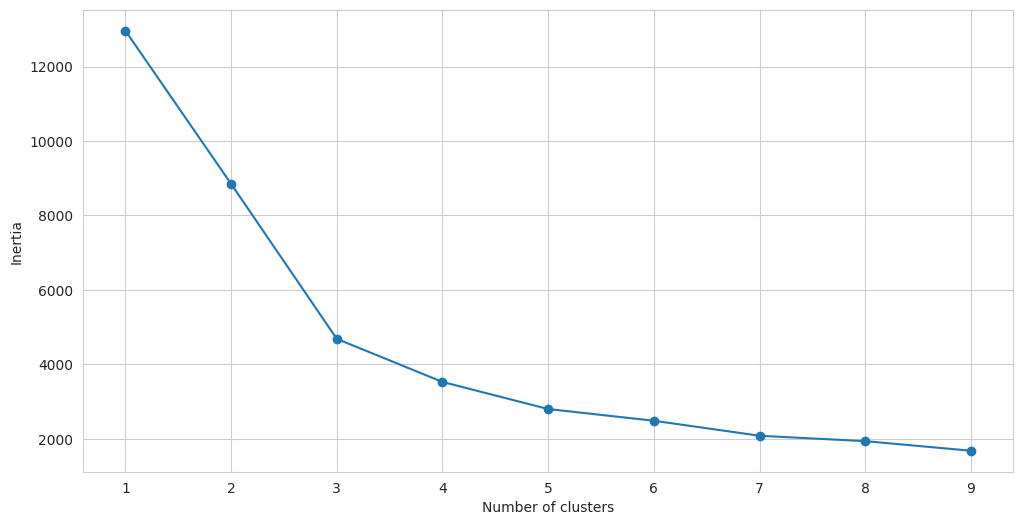

In [169]:
# Step 4: Build segmentation model
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


SSE = [] #initialize empty list

# instantiate and fit model to df_scaled
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and visualize
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('elbow_method.png')
plt.show()


**Interpretation of Results of Visual:**

The "elbow" point on the curve usually indicates a good balance between minimizing SSE and having a reasonable number of clusters.

In our case, the "elbow"  is at the 3-cluster mark.

This means that the optimal number of clusters to use in this K-Means algorithm is 3.

Let’s now build the model with 3 clusters:

In [170]:
# Build model with 3 clusters
kmeans =  KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

**Model performance**

Evaluate performance of a model using the **silhouette score**. This is a coefficient value that ranges from -1 to +1. A higher silhouette score is indicative of a better model.

In [171]:
# Evaluate performance of the model
print(silhouette_score(df_scaled, kmeans.labels_))

0.5178112189083216


**Silhouette Score Interpretation**

The silhouette score of the model is 0.5, indicaing that the clusters are reasonably well-separated.

Most points are closer to their own cluster's centroid than to other clusters' centroids.

### Segementation Model Interpretation and Visualization

This phase entails assigning clusters to each customer in the dataset.

Key steps to be executed:

- We make predictions using the kmeans model to determine classes of each record in `df` dataset (our non-standardized dataframe)
- visualize our data to identify the distinct traits of customers in each segment

In [172]:
# Step 1: Predicting classes of each customer record based on rfm
predictions = kmeans.predict(df_scaled)
predictions

# add predictions as a column to df
df['Cluster'] = predictions
print(df)


      Recency  Frequency  Monetary  Cluster
0         325          2      0.00        2
1           1        182   4310.00        1
2          74         31   1797.24        0
3          18         73   1757.55        0
4         309         17    334.40        2
...       ...        ...       ...      ...
4367      277         10    180.60        2
4368      180          7     80.82        2
4369        7         13    176.60        0
4370        3        756   2094.88        1
4371       42         70   1837.28        0

[4321 rows x 4 columns]


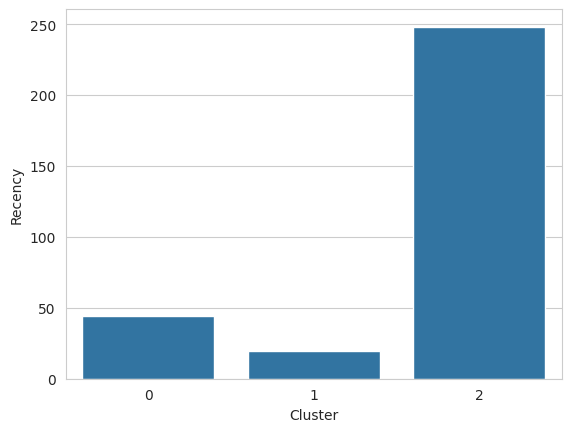

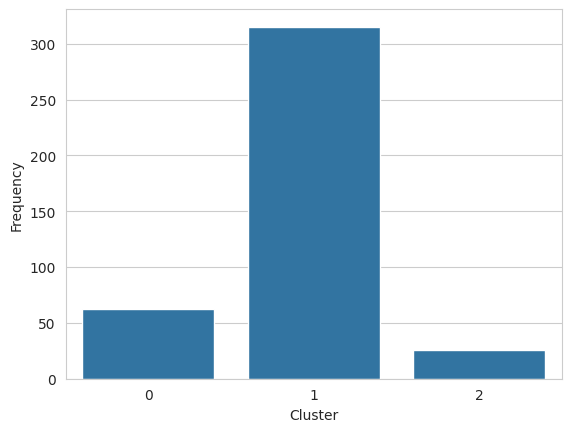

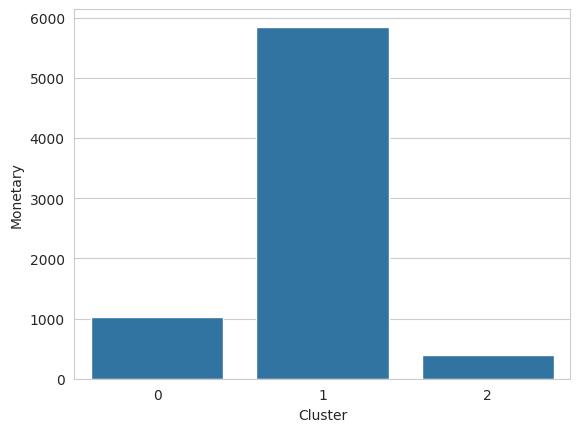

In [173]:
# Step 2: Visualize distinct traits of customer segments
segments_df = df.groupby(['Cluster'], as_index=False).mean()
for i in items:
    sns.barplot(x='Cluster',y=str(i),data=segments_df)
    plt.savefig("Customer segments.png")
    plt.show()

# Results of Customer Segments based on Clusters

The ouput of the visual above shows various customer segments based on RFM approach. Key traits of each customer segment based on their cluster:

1. **Cluster 0**:

- The customers have high recency, low frequency and
low monetary value scores. The can be categorized as as **New Customers/Promising.**

They are likely new to your business and have made a recent purchase but haven't yet shown a pattern of frequent purchases or high spending. They hold potential for becoming more engaged with your business.

Key strategies of converting them:

a) Promotional Offers: Offer promotions or incentives to encourage repeat purchases.

b) Personalized Messages: Send personalized follow-up emails or offers to build loyalty

2. **Cluster 1**:

- The customers have low recency, high frequency and
high monetary value scores.

They are the most **valuable and loyal customers** who have spent a lot and purchased frequently in the past but haven't bought anything recently.

3. **Cluster 2**:

- The customers have low recency, moderate frequency and low monetary value scores.

These customers have engaged with your business in the past but haven't purchased anything recently and typically do not spend much. They are at risk of becoming inactive and may need some re-engagement to get them back.